In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_excel(r'House_Rent_Dataset.xlsx')
data

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [3]:
data['Rent'].value_counts().unique()

array([275, 248, 238, 175, 162, 136, 131, 130, 128, 125, 118, 117, 113,
       109, 103,  91,  90,  87,  83,  82,  77,  74,  73,  51,  49,  45,
        43,  39,  38,  37,  36,  35,  33,  31,  30,  27,  25,  24,  23,
        22,  21,  20,  19,  18,  17,  16,  15,  14,  13,  12,  11,  10,
         9,   8,   7,   6,   5,   4,   3,   2,   1], dtype=int64)

In [4]:
data.describe(include='all')

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
count,4746,4746.000000,4.746000e+03,4746.000000,4746,4746,4746,4746,4746,4746,4746.000000,4746
unique,81,NaN,NaN,NaN,480,3,2235,6,3,3,NaN,3
top,2022-07-06 00:00:00,NaN,NaN,NaN,1 out of 2,Super Area,Bandra West,Mumbai,Semi-Furnished,Bachelors/Family,NaN,Contact Owner
freq,311,NaN,NaN,NaN,379,2446,37,972,2251,3444,NaN,3216
first,2022-04-13 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2022-07-11 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.083860,3.499345e+04,967.490729,NaN,NaN,NaN,NaN,NaN,NaN,1.965866,NaN
std,NaN,0.832256,7.810641e+04,634.202328,NaN,NaN,NaN,NaN,NaN,NaN,0.884532,NaN
min,NaN,1.000000,1.200000e+03,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
25%,NaN,2.000000,1.000000e+04,550.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN


In [6]:
print("No of duplicate records - ",data.duplicated().sum())
print("% of Duplicate records - " , data.duplicated().sum()/len(data)*100)

No of duplicate records -  0
% of Duplicate records -  0.0


In [7]:
data['Floor'].value_counts()

1 out of 2         379
Ground out of 2    350
2 out of 3         312
2 out of 4         308
1 out of 3         293
                  ... 
11 out of 31         1
50 out of 75         1
18 out of 26         1
12 out of 27         1
23 out of 34         1
Name: Floor, Length: 480, dtype: int64

In [13]:
for feat in data.select_dtypes('object'):
    print(f'"{feat}" has {len(data[feat].unique())} unique values or {(len(data[feat].unique())/data.shape[0])*100:.2f}% of total values')

"Floor" has 480 unique values or 10.11% of total values
"Area Type" has 3 unique values or 0.06% of total values
"Area Locality" has 2235 unique values or 47.09% of total values
"City" has 6 unique values or 0.13% of total values
"Furnishing Status" has 3 unique values or 0.06% of total values
"Tenant Preferred" has 3 unique values or 0.06% of total values
"Point of Contact" has 3 unique values or 0.06% of total values


In [14]:
data.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [73]:
df=data.copy()
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [16]:
import numpy as np

def parse_floor2(x):
    x = str(x).strip().lower()

    # Case: "x out of y"
    if "out of" in x:
        left, right = x.split("out of")
        left, right = left.strip(), right.strip()

        # current floor
        if "ground" in left:
            curr = 0
        elif "basement" in left:
            curr = -1
        elif left.isdigit():
            curr = int(left)
        else:
            curr = np.nan

        # total floors
        max_floor = int(right) if right.isdigit() else np.nan

        return curr, max_floor

    # Case: single value
    if "ground" in x:
        return 0, np.nan
    elif "basement" in x:
        return -1, np.nan
    elif x.isdigit():
        return int(x), np.nan
    else:
        return np.nan, np.nan


In [74]:
df[['current_flat', 'max_floors']] = (df['Floor'].apply(lambda v: pd.Series(parse_floor2(v))).astype('Int64'))


In [75]:
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,current_flat,max_floors
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0,2
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1,2
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,3,5
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,1,4
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent,3,5
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent,23,34


In [76]:
df.drop(columns=['Posted On','Point of Contact','Area Locality'],inplace=True)

In [77]:
df.drop(columns=['Floor'],inplace=True)

In [78]:
df

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,current_flat,max_floors
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,0,2
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,1,3
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,1,3
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,1,2
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,1,2
...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,2,3,5
4742,3,29000,2000,Super Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,1,4
4743,3,35000,1750,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,3,5
4744,3,45000,1500,Carpet Area,Hyderabad,Semi-Furnished,Family,2,23,34


In [79]:
df['Area Type'].value_counts()

Super Area     2446
Carpet Area    2298
Built Area        2
Name: Area Type, dtype: int64

In [81]:
df = df[df['Area Type'] != 'Built Area']

In [82]:
df['Tenant Preferred'].value_counts()

Bachelors/Family    3442
Bachelors            830
Family               472
Name: Tenant Preferred, dtype: int64

In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [83]:
df['Tenant Preferred']=le.fit_transform(df['Tenant Preferred'])
new_mapping=dict(zip(le.classes_,le.transform(le.classes_)))
print(new_mapping)

{'Bachelors': 0, 'Bachelors/Family': 1, 'Family': 2}


In [84]:
df['Area Type']=le.fit_transform(df['Area Type'])
new_mapping=dict(zip(le.classes_,le.transform(le.classes_)))
print(new_mapping)

{'Carpet Area': 0, 'Super Area': 1}


In [69]:
#df['Area Type']=le.inverse_transform(df['Area Type'])

In [85]:
df['City']=le.fit_transform(df['City'])
new_mapping=dict(zip(le.classes_,le.transform(le.classes_)))
print(new_mapping)

{'Bangalore': 0, 'Chennai': 1, 'Delhi': 2, 'Hyderabad': 3, 'Kolkata': 4, 'Mumbai': 5}


In [86]:
df['Furnishing Status']=le.fit_transform(df['Furnishing Status'])
new_mapping=dict(zip(le.classes_,le.transform(le.classes_)))
print(new_mapping)

{'Furnished': 0, 'Semi-Furnished': 1, 'Unfurnished': 2}


In [87]:
df

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,current_flat,max_floors
0,2,10000,1100,1,4,2,1,2,0,2
1,2,20000,800,1,4,1,1,1,1,3
2,2,17000,1000,1,4,1,1,1,1,3
3,2,10000,800,1,4,2,1,1,1,2
4,2,7500,850,0,4,2,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,0,3,1,1,2,3,5
4742,3,29000,2000,1,3,1,1,3,1,4
4743,3,35000,1750,0,3,1,1,3,3,5
4744,3,45000,1500,0,3,1,2,2,23,34


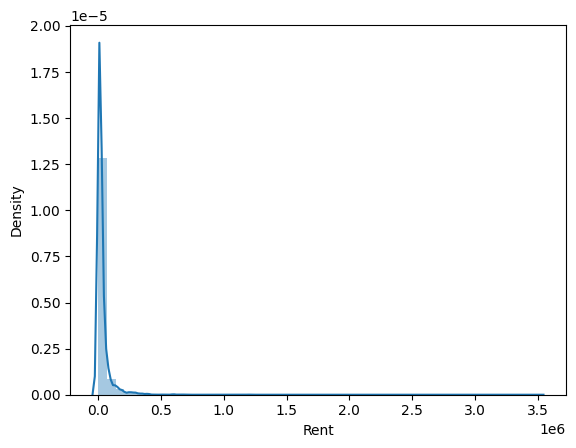

In [36]:
sns.distplot(df['Rent'])
plt.show()

In [88]:
print('Number of unique values in a column')
print(df.nunique())

Number of unique values in a column
BHK                    6
Rent                 243
Size                 615
Area Type              2
City                   6
Furnishing Status      3
Tenant Preferred       3
Bathroom               8
current_flat          53
max_floors            66
dtype: int64


In [89]:
numeric_cols=df.select_dtypes(include=[np.number]).columns.tolist()
binary_cols= [i for i in numeric_cols if df[i].nunique()==2]
ordinal_cols=[i for i in numeric_cols if 2<df[i].nunique()<=10]
continuous_cols=[i for i in numeric_cols if df[i].nunique()>10]

In [90]:
print(f"Binary columns ({len(binary_cols)}): {binary_cols}")
print(f"Ordinal columns ({len(ordinal_cols)}): {ordinal_cols}")
print(f"Continuous columns ({len(continuous_cols)}): {continuous_cols}")

Binary columns (1): ['Area Type']
Ordinal columns (5): ['BHK', 'City', 'Furnishing Status', 'Tenant Preferred', 'Bathroom']
Continuous columns (4): ['Rent', 'Size', 'current_flat', 'max_floors']


In [91]:
print("Ranges and statistics of numeric features:\n")

for col in [*continuous_cols, *ordinal_cols]:
    print(f"Feature: {col}")
    print(f"  Range: {df[col].min()} – {df[col].max()}")
    print(f"  Mean: {df[col].mean():.2f}")
    print(f"  Median: {df[col].median():.2f}")
    print(f"  Variance: {df[col].var():.2f}")
    print(f"  Std deviation: {df[col].std():.2f}")
    print(f"  Unique values: {df[col].nunique()}")
    print(f"  Missing: {df[col].isna().sum()}\n")

Ranges and statistics of numeric features:

Feature: Rent
  Range: 1200 – 3500000
  Mean: 35003.78
  Median: 16000.00
  Variance: 6102922591.47
  Std deviation: 78121.20
  Unique values: 243
  Missing: 0

Feature: Size
  Range: 10 – 8000
  Mean: 967.58
  Median: 850.00
  Variance: 402335.89
  Std deviation: 634.30
  Unique values: 615
  Missing: 0

Feature: current_flat
  Range: -1 – 76
  Mean: 3.44
  Median: 2.00
  Variance: 33.33
  Std deviation: 5.77
  Unique values: 53
  Missing: 0

Feature: max_floors
  Range: 1 – 89
  Mean: 6.97
  Median: 4.00
  Variance: 89.71
  Std deviation: 9.47
  Unique values: 66
  Missing: 4

Feature: BHK
  Range: 1 – 6
  Mean: 2.08
  Median: 2.00
  Variance: 0.69
  Std deviation: 0.83
  Unique values: 6
  Missing: 0

Feature: City
  Range: 0 – 5
  Mean: 2.46
  Median: 2.00
  Variance: 3.19
  Std deviation: 1.79
  Unique values: 6
  Missing: 0

Feature: Furnishing Status
  Range: 0 – 2
  Mean: 1.24
  Median: 1.00
  Variance: 0.47
  Std deviation: 0.68
  Un

In [92]:
df.dropna(subset=['max_floors','current_flat'],inplace=True)

In [93]:
df[['max_floors','current_flat']].isnull().sum()

max_floors      0
current_flat    0
dtype: int64

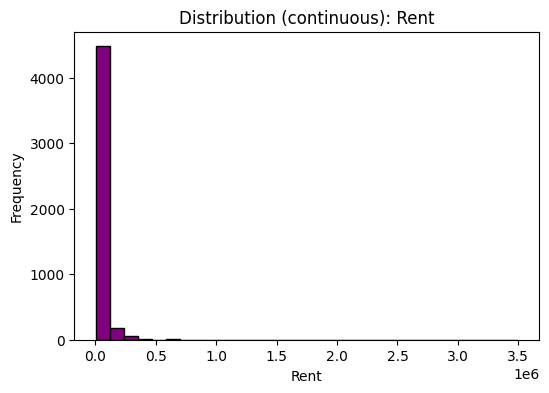

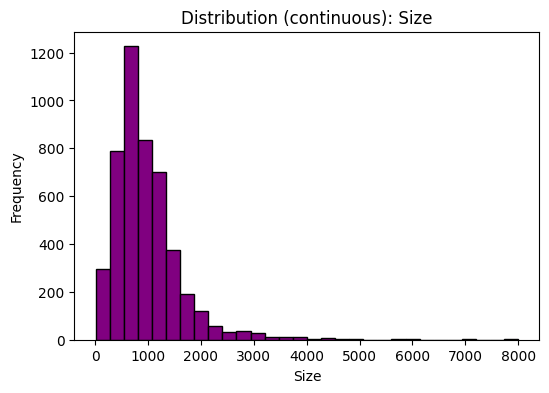

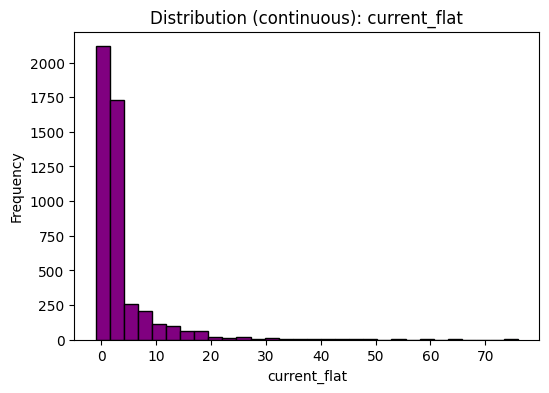

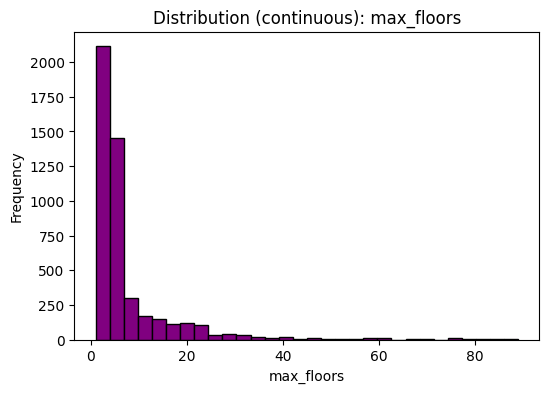

In [95]:
for col in continuous_cols:
    plt.figure(figsize=(6,4))
    plt.hist(df[col], bins=30, edgecolor="black",color='purple')
    plt.title(f"Distribution (continuous): {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

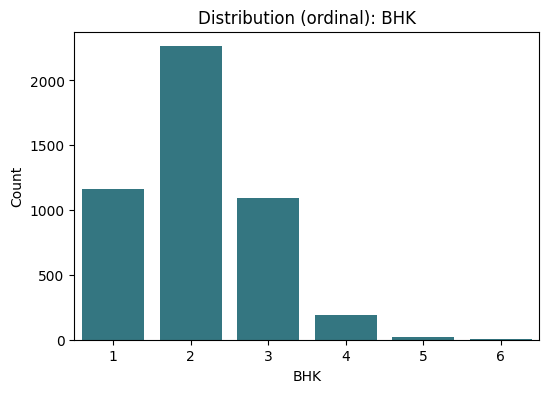

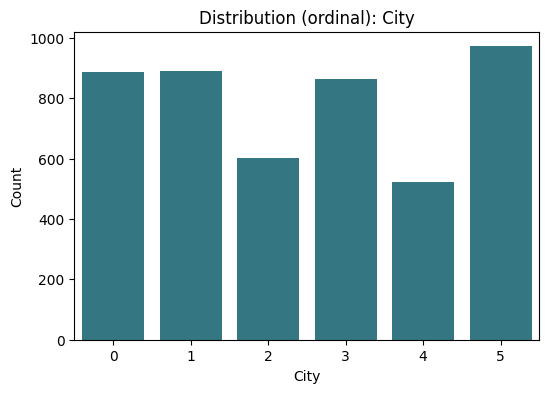

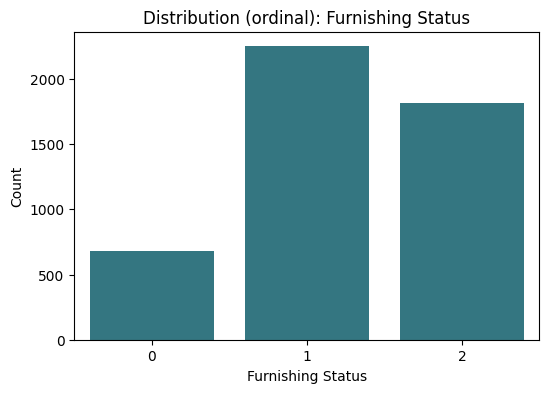

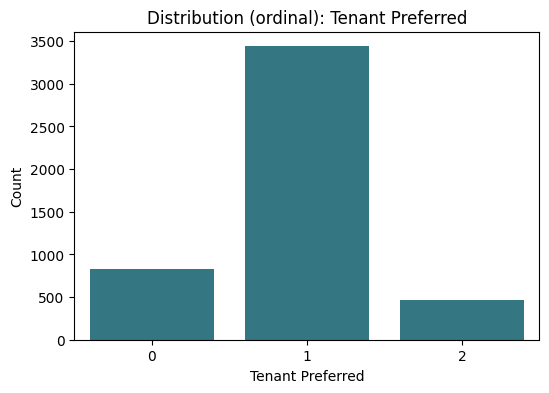

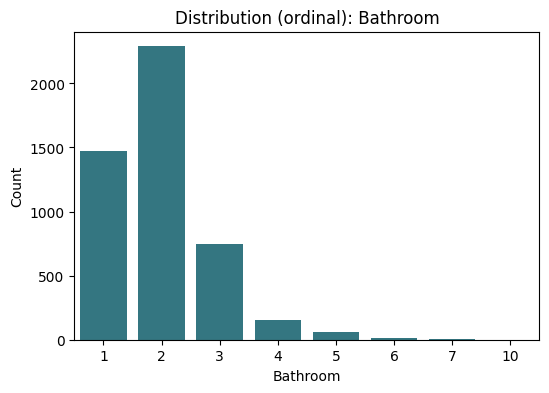

In [104]:
for col in ordinal_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col],color=sns.color_palette("viridis")[2])
    plt.title(f"Distribution (ordinal): {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

# Insights

bathroom - most observations are concentrated at 1-3 bathrooms, with a tail stretching up to 10. Rare cases with 6 or more appear to be outliers.

size - the distribution is heavily right-skewed. The majority of apartments have an area of up to 2000 sq. ft., but values reach as high as 8000, creating a long tail and indicating potential outliers.

rent - even more sharply right-skewed. Most values are concentrated below 100k, but there are isolated cases up to 3.5 million.

bhk - the distribution is discrete, with 2-3 room options being the most common. Values above 4 are very rare and may be treated as a separate category or considered outliers.

current_flat - has a strongly right-skewed distribution: most apartments are located on lower floors (0-5), while rare cases exceed 70 floors. These values form a long tail and may be considered outliers.

max_flat - most often does not exceed 10, but buildings with 40-90 floors also occur. These cases are rare and create a heavy tail in the distribution.

furnishing_status - shows imbalance: most observations belong to the "semi-furnished" category, fewer to "unfurnished," and fully furnished apartments are the rarest.

In [105]:
df.columns

Index(['BHK', 'Rent', 'Size', 'Area Type', 'City', 'Furnishing Status',
       'Tenant Preferred', 'Bathroom', 'current_flat', 'max_floors'],
      dtype='object')

In [112]:
print('Size \n',df["Size"].sort_values().tail(10))
print('\nRent \n',df["Rent"].sort_values().tail(10))
print('\nMax_floors \n',df["max_floors"].sort_values().tail(10))

Size 
 3879    4500
2236    4550
4241    4761
4543    4761
1810    4800
1001    5000
2048    5700
3622    6000
4457    7000
4185    8000
Name: Size, dtype: int64

Rent 
 3656     600000
1384     600000
792      600000
1319     650000
1484     680000
1459     700000
1329     850000
827     1000000
1001    1200000
1837    3500000
Name: Rent, dtype: int64

Max_floors 
 780     76
1055    77
1208    77
1345    78
651     78
579     78
531     78
1482    81
1425    85
601     89
Name: max_floors, dtype: Int64


In [113]:
df = df[df["Rent"] <= 300000]   
df = df[df["Size"] <= 5000]    
df = df[df["max_floors"] <= 78]

In [114]:
df.shape

(4695, 10)

In [115]:
df.describe()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,current_flat,max_floors
count,4695.000000,4695.000000,4695.000000,4695.000000,4695.000000,4695.000000,4695.000000,4695.000000,4695.0,4695.0
mean,2.066454,30460.046858,948.206603,0.519702,2.441321,1.242812,0.924175,1.942918,3.342066,6.801278
std,0.812302,40630.820070,588.447732,0.499665,1.781981,0.683857,0.517484,0.847652,5.546961,9.035573
min,1.000000,1200.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.0,1.0
25%,2.000000,10000.000000,550.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.0,2.0
50%,2.000000,16000.000000,850.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.0,4.0
75%,3.000000,32000.000000,1200.000000,1.000000,4.000000,2.000000,1.000000,2.000000,3.0,6.0
max,6.000000,300000.000000,4800.000000,1.000000,5.000000,2.000000,2.000000,7.000000,76.0,78.0


In [116]:
X = df.select_dtypes(include=[np.number]).drop(columns=["Rent"]).astype(float)
X

,BHK,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,current_flat,max_floors
0,2.0,1100.0,1.0,4.0,2.0,1.0,2.0,0.0,2.0
1,2.0,800.0,1.0,4.0,1.0,1.0,1.0,1.0,3.0
2,2.0,1000.0,1.0,4.0,1.0,1.0,1.0,1.0,3.0
3,2.0,800.0,1.0,4.0,2.0,1.0,1.0,1.0,2.0
4,2.0,850.0,0.0,4.0,2.0,0.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...
4741,2.0,1000.0,0.0,3.0,1.0,1.0,2.0,3.0,5.0
4742,3.0,2000.0,1.0,3.0,1.0,1.0,3.0,1.0,4.0
4743,3.0,1750.0,0.0,3.0,1.0,1.0,3.0,3.0,5.0
4744,3.0,1500.0,0.0,3.0,1.0,2.0,2.0,23.0,34.0


In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data['feature']=X.columns
vif_data['VIF']=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]

In [120]:
vif_data

,feature,VIF
0,BHK,21.425011
1,Size,9.079474
2,Area Type,2.217702
3,City,3.273026
4,Furnishing Status,3.371125
5,Tenant Preferred,3.923207
6,Bathroom,21.274226
7,current_flat,5.094230
8,max_floors,6.375917


# Insights
There is a clear sign of multicollinearity. bhk, bathroom, and size carry almost the same information. The more rooms (bhk) an apartment has, the larger its area (size) and the greater the number of bathrooms (bathroom).

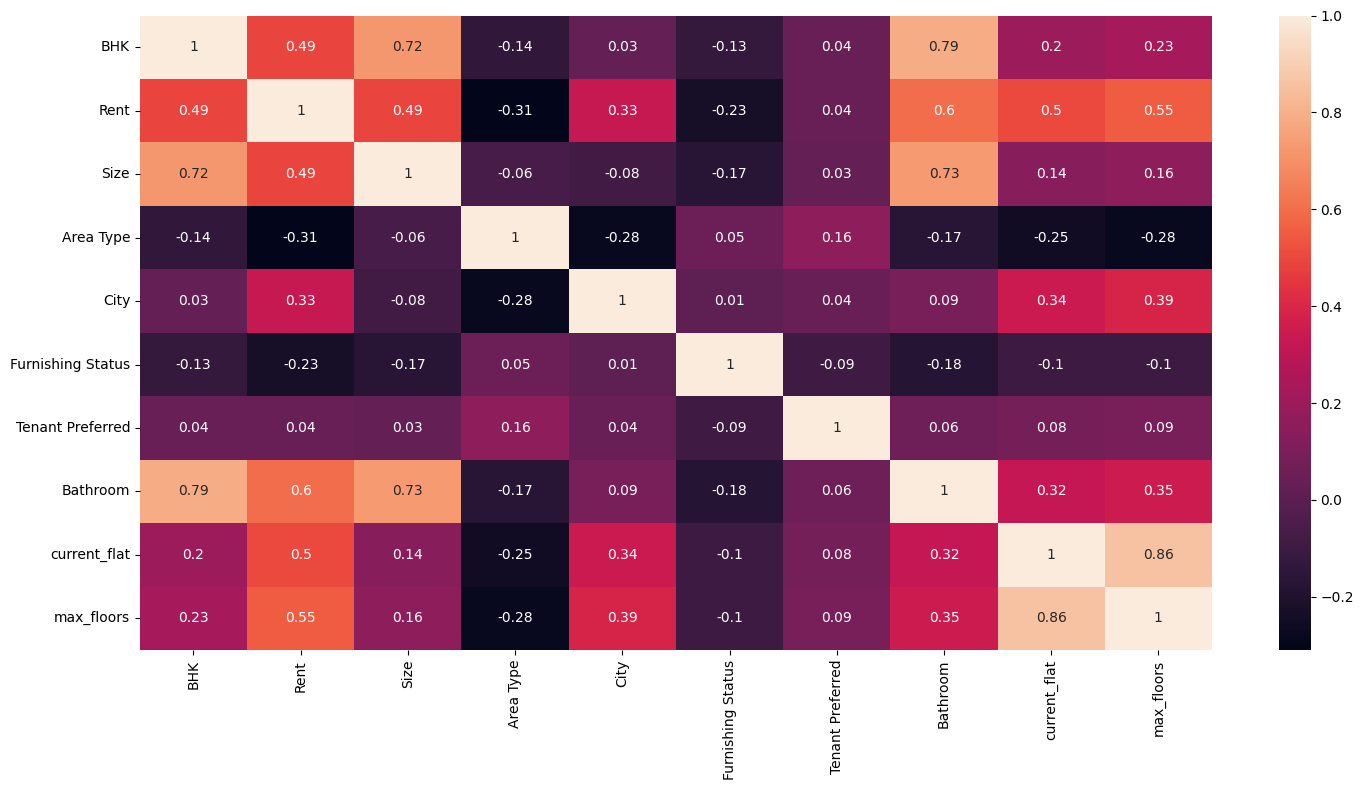

In [122]:
fig, ax = plt.subplots(figsize=(15,  8))
sns.heatmap(df.corr().round(2), annot=True, ax=ax)
fig.tight_layout()

In [127]:
print("\nAverage rent by bhk:")
print(df.groupby("BHK")["Rent"].mean())

print("\nAverage rent by max_flat:")
print(df.groupby("max_floors")["Rent"].mean())

print("\nAverage rent by current_flat:")
print(df.groupby("current_flat")["Rent"].mean())

print("\nAverage rent by bathroom:")
print(df.groupby("Bathroom")["Rent"].mean())


Average rent by bhk:
BHK
1     13983.225086
2     21862.467728
3     50421.402394
4    125481.443114
5    122812.500000
6     73125.000000
Name: Rent, dtype: float64

Average rent by max_flat:
max_floors
1      16224.189759
2      14703.279769
3      18055.908096
4      22101.390977
5      23053.288095
          ...      
71     90000.000000
75    160000.000000
76    223333.333333
77    140000.000000
78    282500.000000
Name: Rent, Length: 63, dtype: float64

Average rent by current_flat:
current_flat
-1     41656.250000
0      16759.643243
1      19543.071861
2      22032.248672
3      27235.722986
4      32653.412639
5      53454.509317
6      61282.597826
7      59383.597222
8      63389.203125
9      75078.156250
10     58993.846154
11     75390.243902
12     63988.888889
13     41733.333333
14     76220.588235
15     62100.000000
16     74452.380952
17     71523.809524
18     87875.000000
19     59750.000000
20     89545.454545
21     97500.000000
22    180000.000000
23     65111

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [129]:
# 1. X and y
X = df.drop(columns=["Rent"])
y = df["Rent"]

# 2. train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression with scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [130]:
Decision_tree=DecisionTreeRegressor()
Decision_tree.fit(X_train_scaled,y_train)

DecisionTreeRegressor()

In [131]:
Y_pred_dc=Decision_tree.predict(X_test_scaled)

In [133]:
print("Decision Tree:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, Y_pred_dc)))
print("MAE:", mean_absolute_error(y_test, Y_pred_dc))
r2=r2_score(y_test, Y_pred_dc)
print("R-squared:",r2)
adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

Decision Tree:
RMSE: 28097.659511865546
MAE: 12615.586084487044
R-squared: 0.5546788280505074
Adj R-square: 0.5538233551481497


In [134]:
Decision_treenormal=DecisionTreeRegressor()
Decision_treenormal.fit(X_train,y_train)

DecisionTreeRegressor()

In [135]:
Y_pred_dc_nor=Decision_treenormal.predict(X_test)

In [136]:
print("Decision Tree:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, Y_pred_dc_nor)))
print("MAE:", mean_absolute_error(y_test, Y_pred_dc_nor))
r2=r2_score(y_test, Y_pred_dc_nor)
print("R-squared:",r2)
adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

Decision Tree:
RMSE: 28687.568232284906
MAE: 12951.713880014198
R-squared: 0.5357835520195396
Adj R-square: 0.5348917808281151


In [137]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [138]:
print("Decision Tree:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
r2=r2_score(y_test, y_pred_rf)
print("R-squared:",r2)
adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

Decision Tree:
RMSE: 20236.79793438056
MAE: 9843.612421011421
R-squared: 0.768997519683805
Adj R-square: 0.7685537582488327


In [141]:
model_RandomForest=RandomForestRegressor( random_state=10, bootstrap=True)
parameter_space = {
    'n_estimators':[100,300,500,1000],       
    'max_depth':[10,15,8, 12],
    'min_samples_leaf':[1,3,4,5,6,7]
    }
from sklearn.model_selection import RandomizedSearchCV #RandomizedSearchCV
clf= RandomizedSearchCV(model_RandomForest, parameter_space, n_jobs=-1, cv=5)

In [142]:
clf.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=10),
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 15, 8, 12],
                                        'min_samples_leaf': [1, 3, 4, 5, 6, 7],
                                        'n_estimators': [100, 300, 500, 1000]})

In [143]:
print(clf.best_params_)
clf.best_score_

{'n_estimators': 500, 'min_samples_leaf': 3, 'max_depth': 10}


0.7660257238910967

In [144]:
y_pred_random=clf.predict(X_test)

In [145]:
print("Decision Tree:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_random)))
print("MAE:", mean_absolute_error(y_test, y_pred_random))
r2=r2_score(y_test, y_pred_random)
print("R-squared:",r2)
adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

Decision Tree:
RMSE: 19726.165763879304
MAE: 9808.380054768008
R-squared: 0.780508144896972
Adj R-square: 0.7800864956555787
